In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, Draw
from PIL import Image

from fragenum import fragenum

In [2]:
# データを読み込む
ms_pcp_interp=pd.read_pickle("ProcessedData/ms_pcp_interp.pkl")

iupac_name: 1,1,1-trifluoroethane
molecular_formula: C2H3F3
weight: 84.03999999999999
SMILES: [H]C([H])([H])C(F)(F)F


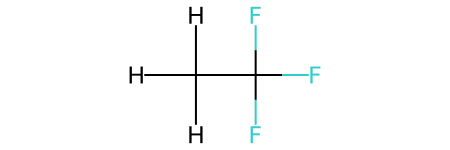

[ 2. 12. 13. 14. 15. 16. 19. 20. 24. 25. 26. 27. 31. 32. 33. 34. 43. 44.
 45. 46. 50. 51. 52. 62. 63. 64. 65. 66. 69. 70. 81. 82. 83. 84. 85.]


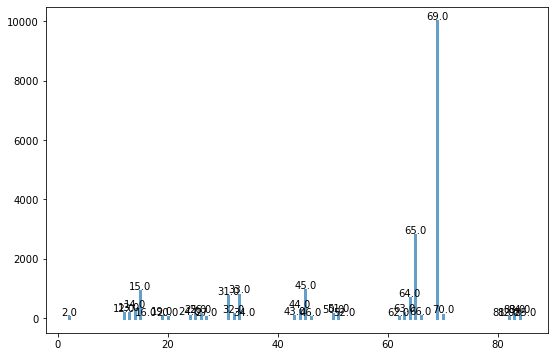

In [22]:
i=3
# 1つのデータについてみてみる。
a_ms_data=ms_pcp_interp.iloc[i,:]
print("iupac_name:",a_ms_data["iupac_name"])
print("molecular_formula:",a_ms_data["molecular_formula"])
mol=Chem.MolFromSmiles(a_ms_data["canonical_smiles"])
mol=Chem.AddHs(mol)
print("weight:",Descriptors.MolWt(mol))
smiles=Chem.MolToSmiles(mol)
print("SMILES:",smiles)

display(mol)


plt.figure(figsize=(9,6))
m_z=a_ms_data["x"]
intens=a_ms_data["y"]
spectrum_num=len(m_z)
# 真のデータを図示
for j in range(spectrum_num):
    plt.plot([m_z[j],m_z[j]],[0,intens[j]],color='C0',alpha=0.7, lw=3)
    plt.text(m_z[j], intens[j], m_z[j], ha='center', va='bottom',size=10)
print(m_z)

In [23]:
CP_t=fragenum.CombProducts(b_exist_atm=True,b_exist_rad=True)
CP_t.set_mol(mol)
CP_t.GenProComb()
# CP_t.DispComb()

RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not r

RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:59:30] WARNING: not r

In [26]:
frag_data=[]
# 分子から考えられるフラグメントの集まり(Products)のリスト
for j in range(len(CP_t.l_prod)):
    if len(CP_t.l_prod[j].l_comp)!=2:
        continue
    # フラグメントのリストの集まり(Products)から
    # SMILESのリストとMolのリストをとり出す
    smiles_list=CP_t.l_prod[j].smiles_list
    mol_list=CP_t.l_prod[j].mol_list
    # フラグメントの数
    frag_num=len(smiles_list)
    
    # 重複がないようにset化してSMILESを取り出す。
    for smi in set(smiles_list):
        # 当該SMILESのindex
        frag_idx=smiles_list.index(smi)
        # これが候補fragmentとなる
        candidate_frag=mol_list[frag_idx]
        frag_counter=0
        # fragmentの質量(MSのm/zとなる)
        weight=Descriptors.MolWt(candidate_frag)
        weight=int(np.round(weight,0))
        data_dict={
            "source_mol_no":i,
            "source":mol,
            "source_smiles":smiles,
            "candidate_frag":candidate_frag,
            "candidate_frag_smiles":smiles_list[frag_idx],
            "weight":weight,
            "intensity":a_ms_data[weight]}
        # 候補fragment以外を辞書に格納
        for k in range(frag_idx):
            data_dict["other_frag_{:0=2}".format(frag_counter)]=mol_list[k]
            data_dict["other_frag_{:0=2}_smiles".format(frag_counter)]=smiles_list[k]
            frag_counter+=1
        for k in range(frag_idx+1,frag_num):
            data_dict["other_frag_{:0=2}".format(frag_counter)]=mol_list[k]
            data_dict["other_frag_{:0=2}_smiles".format(frag_counter)]=smiles_list[k]
            frag_counter+=1
        frag_data.append(data_dict)

In [27]:
df=pd.DataFrame(frag_data)
df

,source_mol_no,source,source_smiles,candidate_frag,candidate_frag_smiles,weight,intensity,other_frag_00,other_frag_00_smiles
0,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd5799817b0>,[H][H],2,30.0,<rdkit.Chem.rdchem.Mol object at 0x7fd579981210>,[H]C(F)=C(F)F
1,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd579981210>,[H]C(F)=C(F)F,82,30.0,<rdkit.Chem.rdchem.Mol object at 0x7fd5799817b0>,[H][H]
2,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd57995a940>,[H]F,20,20.0,<rdkit.Chem.rdchem.Mol object at 0x7fd579981ee0>,[H]C([H])=C(F)F
3,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd579981ee0>,[H]C([H])=C(F)F,64,661.0,<rdkit.Chem.rdchem.Mol object at 0x7fd57995a940>,[H]F
4,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd5798d1710>,[H]F,20,20.0,<rdkit.Chem.rdchem.Mol object at 0x7fd5798d1530>,[H]C(F)=C([H])F
5,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd5798d1530>,[H]C(F)=C([H])F,64,661.0,<rdkit.Chem.rdchem.Mol object at 0x7fd5798d1710>,[H]F
6,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd57993bf80>,FF,38,0.0,<rdkit.Chem.rdchem.Mol object at 0x7fd57993b2b0>,[H]C([H])=C([H])F
7,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd57993b2b0>,[H]C([H])=C([H])F,46,30.0,<rdkit.Chem.rdchem.Mol object at 0x7fd57993bf80>,FF
8,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd579881170>,[H][C]([H])C(F)(F)F,83,130.0,<rdkit.Chem.rdchem.Mol object at 0x7fd5798810d0>,[H]
9,3,<rdkit.Chem.rdchem.Mol object at 0x7fd5846d9260>,[H]C([H])([H])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd5798810d0>,[H],1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7fd579881170>,[H][C]([H])C(F)(F)F


In [28]:
desc_list = Descriptors.descList

In [29]:
# 候補フラグメントのデータについて記述子を計算
desc_data=[]
invalid_desc_set=set()
for index,row in df.iterrows():
    c_mol=row["candidate_frag"]
    desc_dict={}
    for desc,func in desc_list:
        try:
            desc_dict[desc]=func(c_mol)
        except:
            # エラーが発生したものについてはpd.NAを代入
            invalid_desc_set.add(desc)
            desc_dict[desc]=pd.NA
    desc_data.append(desc_dict)

RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:11] WARNING: not removing hydrogen atom without neighbors


In [30]:
cand_desc_df=pd.DataFrame(desc_data)
# 欠損値のある列を削除する
cand_desc_df=cand_desc_df.dropna(how="any",axis=1)

# 有効な値が入っている記述子のみ抽出する
eff_desc_list=[]
cand_rename_dict={}
for desc in cand_desc_df:
    if cand_desc_df[desc].std() >0:
        eff_desc_list.append(desc)
        cand_rename_dict[desc]="cand_frag_"+desc
        
cand_desc_df=cand_desc_df[eff_desc_list]     
cand_desc_df=cand_desc_df.rename(columns=cand_rename_dict)

In [31]:
# もう片方のフラグメントのデータについて記述子を計算
desc_data=[]
invalid_desc_set=set()
for index,row in df.iterrows():
    o_mol=row["other_frag_00"]
    desc_dict={}
    for desc,func in desc_list:
        try:
            desc_dict[desc]=func(o_mol)
        except:
            invalid_desc_set.add(desc)
            desc_dict[desc]=pd.NA
    desc_data.append(desc_dict)

RDKit WARNING: [11:00:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:00:12] WARNING: not removing hydrogen atom without neighbors


In [32]:
other_desc_df=pd.DataFrame(desc_data)
other_desc_df=other_desc_df.dropna(how="any",axis=1)

eff_desc_list=[]
other_rename_dict={}
for desc in other_desc_df:
    if other_desc_df[desc].std() >0:
        eff_desc_list.append(desc)
        other_rename_dict[desc]="other_frag_"+desc
        
other_desc_df=other_desc_df[eff_desc_list]        
other_desc_df=other_desc_df.rename(columns=other_rename_dict)

In [33]:
whole_data=pd.concat([df,cand_desc_df,other_desc_df],axis=1)

In [34]:
null_data=whole_data.isnull().sum()
for col,val in null_data.iteritems():
    if val>0:
        print(col,val)

In [35]:
X=whole_data[list(cand_rename_dict.values())+list(other_rename_dict.values())].values
Y=whole_data["intensity"].values

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

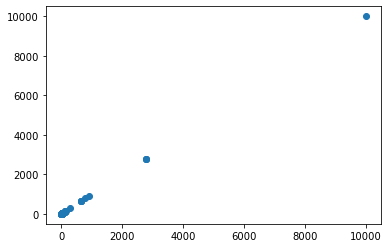

In [37]:
est_intensity=np.maximum(lr.predict(X),0)
plt.plot(Y,est_intensity,'o')

In [165]:
desc_to_func["FractionCSP3"](sp3_mol)

1.0

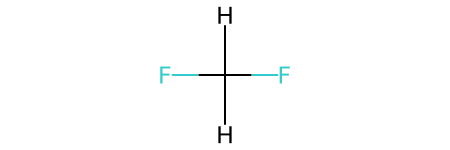

In [164]:
sp3_mol=Chem.MolFromSmiles("[H]C([H])(F)F")
sp3_mol=Chem.AddHs(sp3_mol)
sp3_mol

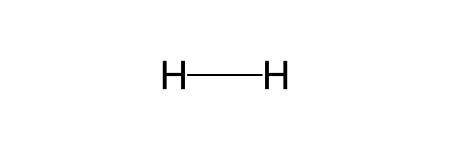

In [142]:
desc_list=Descriptors.descList
len(desc_list)
desc_name_2_func={}
for name,func in desc_list:
    desc_name_2_func[name]=func

In [153]:
for s_mol in s_mol_list:
    maccs_sum=np.sum(
        list(AllChem.GetMACCSKeysFingerprint(s_mol)))
    print(maccs_sum)

6
0
6
2
4
8
4
5
0
5
5
0
2
6
2
5
0
4
2
4
4
2
2
7
4
4
4
7
5
1
5
2
4
6
2
8
3
3


In [57]:
s_mol
for atm in s_mol.GetAtoms():
    num_rad=atm.GetNumRadicalElectrons()
    if num_rad>0:
        atm.SetNumRadicalElectrons(0)
        atm.SetNumExplicitHs(num_rad)

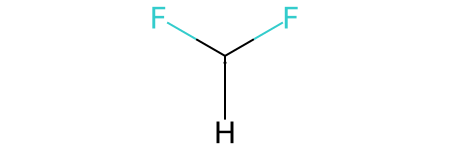

In [81]:
s_mol

In [64]:
noH_mol=Chem.RemoveHs(mol)
noS_mol=Chem.AddHs(s_mol)

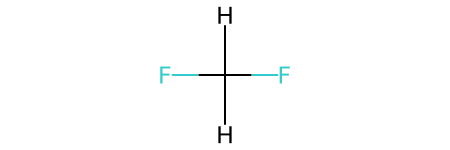

In [65]:
noS_mol

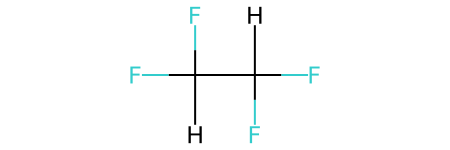

In [68]:
mol

In [69]:
mol.HasSubstructMatch(noS_mol)

False

In [26]:
noH_mol=Chem.RemoveHs(mol)
noS_mol=Chem.RemoveHs(s_mol)

In [105]:
atm_Li=Chem.AtomFromSmiles("[Li]")
atm_Na=Chem.AtomFromSmiles("[Na]")

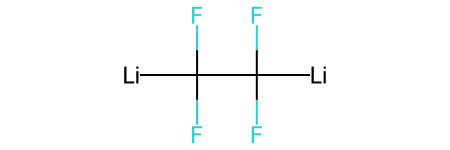

In [123]:
li_mol=replace_H_with_Li(mol)
li_mol

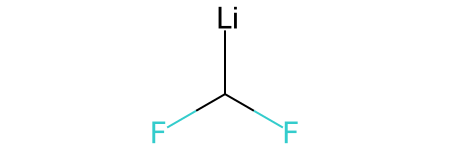

In [122]:
e_s_mol=replace_H_with_Li(s_mol)
e_s_mol=replace_rad_with_H(e_s_mol)
e_s_mol

In [ ]:
atm.SetNumExplicitHs()

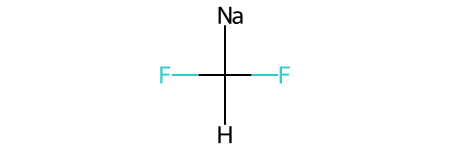

In [107]:
replace_rad_with_na(s_mol)

In [97]:
atm.GetNumRadicalElectrons()

0

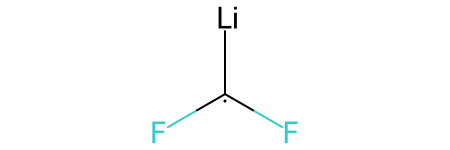

In [94]:
replace_h_with_li(s_mol)

0

In [44]:
rad_cf_mol=Chem.MolFromSmiles("[C][F]")
reg_cf_mol=Chem.MolFromSmiles("CF")

In [51]:
noH_mol.HasSubstructMatch(reg_cf_mol)

True

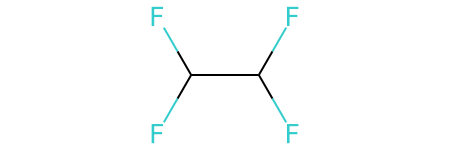

In [52]:
noH_mol

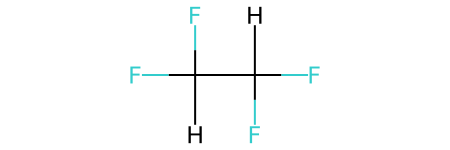

In [53]:
mol

In [5]:
atm_list

['C', 'C', 'F', 'F', 'F', 'F', 'H', 'H']

In [3]:
set_a=set([1,2])
set_b=set([2,3])
set_a.union([1,3])

{1, 2, 3}

In [17]:
set(CP_t.l_prod[0].ar_smiles.tolist()

{'FF', '[H]C#[C]'}

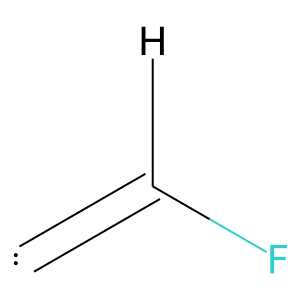

In [19]:
mol=Chem.AddHs(mol)
Draw.MolToImage(mol)

In [125]:
atom=Chem.rdmolfiles.AtomFromSmiles("[C]")
atom

In [172]:
H_atom=Chem.AtomFromSmiles('[H]')
H_atom.SetNumRadicalElectrons(1)


In [183]:
Chem.BondType.SINGLE

rdkit.Chem.rdchem.BondType.SINGLE

None
None


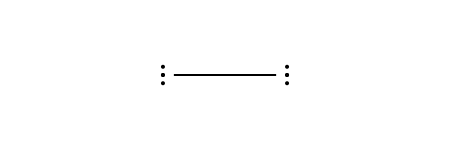

In [164]:
mol = Chem.MolFromSmiles("[C]")
C_atom=Chem.AtomFromSmiles('C')
C_atom.SetNumRadicalElectrons(4)
rwmol = Chem.RWMol(mol)
rwmol.AddAtom(C_atom)
rwmol.AddBond(0,1,Chem.BondType.SINGLE)
for i in rwmol.GetAtoms():
    print(i.SetNumRadicalElectrons(3))
rwmol

RDKit WARNING: [08:35:04] unsupported number of radical electrons 4


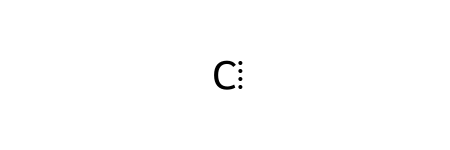

In [150]:
mol

RDKit WARNING: [08:22:48] unsupported number of radical electrons 4


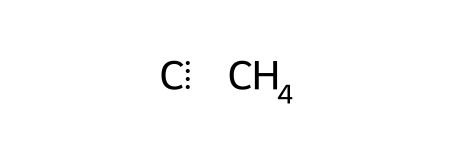

In [118]:
mol

In [156]:
frag=Chem.MolFromSmiles("[C]([H])([H])[F]")
frag=Chem.AddHs(frag)
Descriptors.MolWt(frag)

33.025000000000006

In [160]:
fragSm=Chem.MolFromSmarts("[C]([H])[F]")
mol.HasSubstructMatch(fragSm)

False

In [163]:
Chem.AddHs(mol).HasSubstructMatch(fragSm)

True

In [395]:
l_p_atm=['C','C','F','F','H']
CP_t=CombProducts(l_p_atm,b_exist_atm=True,b_exist_rad=True)
CP_t.CalcComb()
p_t=Products(CP_t.l_p_atm,CP_t.ar_bond_can[1],CP_t.l_vlc)
p_t.GenMols()

In [396]:
CP_t.ar_bond_can[1]

array([[0, 3, 1, 0, 0],
       [3, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [351]:
p_t.m_bnd

array([[1, 3, 0, 0, 0],
       [3, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [378]:
p_t.l_comp

In [380]:
comp=p_t.l_comp[0]

In [381]:
comp.l_atm

[1, 0]

In [388]:
j

0

In [383]:
comp.d_atm

{1: 'C', 0: 'C'}

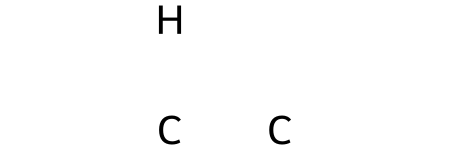

In [245]:
rwmol = Chem.RWMol()
for i in comp.l_atm:
    rwmol.AddAtom(Chem.AtomFromSmiles("["+comp.d_atm[i]+"]"))
for i in range(len(comp.l_atm)):
    rwmol.AddBond(0,1,Chem.BondType.SINGLE)

In [301]:
comp.l_atm

[1, 0, 2]

In [302]:
comp.m_o_b[comp.l_atm[0],comp.l_atm[0]]

1

In [283]:
comp.l_atm

[1, 0, 2]

In [284]:
comp.d_atm

{1: 'C', 0: 'C', 2: 'H'}

In [285]:
comp.m_o_b

array([[0, 3, 1, 0, 0],
       [3, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [289]:
bond_d={
    1:Chem.BondType.SINGLE,
    2:Chem.BondType.DOUBLE,
    3:Chem.BondType.TRIPLE
}

In [293]:
Chem.MolToSmiles(rwmol.GetMol())

'[H]C#[C]'

In [281]:
type(int(num_radical))

int

In [251]:
comp.m_o_b[[0,1,2],:][:,[0,1,2]]

array([[0, 3, 1],
       [3, 1, 0],
       [1, 0, 0]])

In [247]:
comp.l_atm

1

In [239]:
rwmol.AddAtom(C_atom)
rwmol.AddBond(0,1,Chem.BondType.SINGLE)
atom0=rwmol.GetAtomWithIdx(0)
atom0.SetNumRadicalElectrons(3)
atom1=rwmol.GetAtomWithIdx(1)
atom1.SetNumRadicalElectrons(3)

rwmol.AddAtom(H_atom)

for i in rwmol.GetAtoms():
    print(i.GetSymbol())
    
    
rwmol.AddBond(1,2,Chem.BondType.SINGLE)
atom1=rwmol.GetAtomWithIdx(1)
atom1.SetNumRadicalElectrons(2)
atom2=rwmol.GetAtomWithIdx(2)
atom2.SetNumRadicalElectrons(0)
Chem.MolToSmiles(rwmol)

C
C
H


'[H][C][C]'

In [236]:
l_adm

[array([1, 3, 0]), array([3, 0, 1]), array([0, 1, 0])]

In [210]:
comp.l_atm

[1, 0, 2]

In [232]:
comp.m_o_b[[0,1,2],:][:,[0,1,2]]

array([[3, 0, 1],
       [1, 3, 0],
       [0, 1, 0]])

In [218]:
comp.m_o_b

array([[0, 3, 1, 0, 0],
       [3, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [234]:
comp.m_o_b[comp.l_atm,:][:,comp.l_atm]

array([[1, 3, 0],
       [3, 0, 1],
       [0, 1, 0]])

In [212]:
comp

In [206]:
l_n_atm

['C', 'C', 'H']

In [193]:
CP_t.ar_bond_can[0]

array([[0, 3, 1, 0, 0],
       [3, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [96]:
CP_t.comb_c

0

In [207]:
l_bond_r_p

[[3, 0, 0, 0, 0], [2, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

In [ ]:
l_cr

In [88]:
ar_bond_can

array([[[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]],

       ...,

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [71]:
l_l_base

[[0, 1875, 16, 8, 0],
 [0, 1875, 16, 0, 8],
 [0, 1875, 16, 0, 2],
 [0, 1875, 16, 0, 0],
 [0, 1875, 8, 16, 0],
 [0, 1875, 8, 0, 16],
 [0, 1875, 8, 0, 2],
 [0, 1875, 8, 0, 0],
 [0, 1875, 0, 16, 8],
 [0, 1875, 0, 16, 4],
 [0, 1875, 0, 16, 0],
 [0, 1875, 0, 8, 16],
 [0, 1875, 0, 8, 4],
 [0, 1875, 0, 8, 0],
 [0, 1875, 0, 4, 16],
 [0, 1875, 0, 4, 8],
 [0, 1875, 0, 4, 0],
 [0, 1875, 0, 0, 16],
 [0, 1875, 0, 0, 8],
 [0, 1875, 0, 0, 4],
 [0, 1875, 0, 0, 2],
 [0, 1875, 0, 0, 0],
 [0, 1250, 16, 16, 8],
 [0, 1250, 16, 16, 0],
 [0, 1250, 16, 8, 16],
 [0, 1250, 16, 8, 8],
 [0, 1250, 16, 8, 0],
 [0, 1250, 16, 0, 16],
 [0, 1250, 16, 0, 8],
 [0, 1250, 16, 0, 2],
 [0, 1250, 16, 0, 0],
 [0, 1250, 8, 16, 16],
 [0, 1250, 8, 16, 8],
 [0, 1250, 8, 16, 0],
 [0, 1250, 8, 8, 16],
 [0, 1250, 8, 8, 0],
 [0, 1250, 8, 0, 16],
 [0, 1250, 8, 0, 8],
 [0, 1250, 8, 0, 2],
 [0, 1250, 8, 0, 0],
 [0, 1250, 0, 16, 16],
 [0, 1250, 0, 16, 8],
 [0, 1250, 0, 16, 4],
 [0, 1250, 0, 16, 0],
 [0, 1250, 0, 8, 16],
 [0, 1250, 0, 8, 8

In [69]:
j=2
print(ar_bond_cons[0,j,:],l_vlc[j])
Base_n_to_10(ar_bond_cons[0,j,:],l_vlc[j]+1)

[1 0 0 0 0] 1


16

In [39]:
ar_bond_cons

array([[[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]],

       ...,

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [27]:
ar_bond_p

array([[[0, 3, 1, 1, 1],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]],

       [[0, 3, 1, 1, 0],
        [3, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]],

       [[0, 3, 1, 1, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       ...,

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [15]:
for i in itertools.product([1,1],[1,2]):
    print(i)

(1, 1)
(1, 2)
(1, 1)
(1, 2)


In [7]:
l_bond_p

[[[0, 0, 0, 0, 0]],
 [[3, 0, 0, 0, 0], [2, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0]]]

In [6]:
ar_bond_p

array([[[0, 3, 1, 1, 1],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]],

       [[0, 3, 1, 1, 0],
        [3, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]],

       [[0, 3, 1, 1, 0],
        [3, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       ...,

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [167]:
l_p_atm=['C','C','F','F','H']
CP_t=CombProducts(l_p_atm)
CP_t.CalcComb()

NameError: name 'Base_n_to_10' is not defined

In [138]:
Descriptors.MolWt(mol)

102.03000000000002

In [85]:
intens

array([  60.,   60.,   10.,  130.,  480., 1772.,  681.,  220.,  130.,
        190., 2692.,   50.,   10.,  430.,  701., 1021., 9999., 1151.,
         30.])

In [78]:
pt=Chem.GetPeriodicTable()
pt.GetDefaultValence('C')

4

In [66]:
Descriptors.ExactMolWt(mol)

313.21218382809

In [7]:
mol = Chem.MolFromSmiles('CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)[NH3+])C(=O)OCC')

In [36]:
CH4=Chem.MolFromSmiles('C')

In [37]:
Descriptors.MolWt(CH4)

16.043

In [20]:
atom=mol.GetAtoms()